In [2]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" width="30%">
<br clear="all" />
<br></br>

# Intro til tidsdiskrete system

* **Emne: AIS2102 - Dynamiske system**
* ***dato***: 22. januar 2025
* **Foreleser: Kai Erik Hoff**

# Hvorfor diskretisering?
<br>
<br>
<img src="Figurer/intro/disc_loop_1.png" style="width: 80%; margin-left: 10%" />

* *Hvordan kan vi programmere en digital enhet til å gjengi egenskapene gitt av en differensiallikning på en god måte?*

# Tre mulige formål med diskretisering:

1. Diskretisere regulatoren $G_c(s)$ slik at den kan programmeres på f.eks. en mikrokontroller.

2. Diskretisere prosessen $G_p(s)$ for å kunne analysere regulatorsløyfen etter diskretisering.

3. For å kunne simulere regulatorsløyfen (program som f.eks. Simulink gjør diskretisering for oss).

# Arbeider og pensumlitteratur

* Arbeider
    - Én obligatorisk regneøving (frist i kalenderuke 6)
    - Én laboppgave med rapport (inngår i mappen)
        * Frist i kalenderuke 8
        * Utføres i grupper på 2

* Faglitteratur
    - [Discrete-time signals and systems](https://techteach.no/publications/discretetime_signals_systems/discrete.pdf)<br>av Finn Haugen
    - (Kapittel 13, Control Systems Engineering, Norman Nise)<br>Relevant men ikke påkrevd
    - [Videoserie om Diskrét Reguleringsteknikk av Brian Douglas](https://www.youtube.com/playlist?list=PLUMWjy5jgHK0MLv6Ksf-NHi7Ur8NRNU4Z)

# Tema:

* <font color="d62728">Intro til "Hybridsystem"</font>
* Uniform Sampling (A/D omforming)
* Rekonstruksjon (D/A omforming)
* Aliasing
* Kvantisering

# Arbeidsflyt digital regulator (Arduino)


```cpp
int inputValue = analogRead(inputPin); // A/D conversion
int outputValue = doControllerStuff(inputValue); // Evaluate output of G_c(z)
analogWrite(outputPin, outputValue); // D/A conversion
```

* Hver operasjon utføres sekvensielt, ved diskréte tidspunkt.

* Hver av operasjonene får sin egen systemblokk i en systemmodell.

<img src="Figurer/intro/disc_reg_1.png" style="width: 60%; margin-left: 20%" />

# Hybridsystem

<img src="Figurer/intro/hybrid_sys_1.png" style="width: 90%; margin-left: 5%" />

* Sammensetning av *tidskontinuerlige* system ($G_p(s)$) og *tidsdiskrete* system ($G_c(z)$)

# Fokus for diskretiseringsmodul
<img src="Figurer/intro/disc_reg_2.png" style="width: 60%; margin-left: 20%" />

* Oppgave: sørge for at det digitale LTI-systemet oppnår *tilnærmet* samme egenskaper som $G(s)$

* Vi begynner med diskretisering av inngangs-signal (A/D omforming)

# Tema:

* Intro til "Hybridsystem"
* <font color="d62728">Uniform Sampling (A/D omforming)</font>
* Rekonstruksjon (D/A omforming)
* Aliasing
* Kvantisering

# Sampling (A/D omforming)

* Signalet representeres som en serie med måleverdier.
* Oppnås ved å ta gjentatte punktprøver.
    * På f.eks. en Arduino utføres dette med gjentatte kall til funksjonen `analogRead()`.
* Denne prosessen er kjent som sampling.

<div style="width: 90%;">
    <img src="Figurer/Fig5_DigitalSig.png" style="float: left; width: 45%" />
    <div style="float: right; width: 45%">
    <br>
        <b>Notasjon</b>:
        $$u[k],  \ u(k) \text{ eller } u_k$$
    <ul>
        <li><i>Temperatursignalet i figuren er en "tidsdiskret" funksjon av samplenummer 
            </i> $k \in \mathbb{Z}$.</li>
        <li>Bokstavene $l$, $m$ og $n$ er ofte også designert som heltallsvariabler i konteksten av diskréte tallrekker</li>
    </ul>  
    </div>
</div> 

# Sampletid $T_s$

* Samplene ***må*** tas med **jevne tidsintervall**.
    * Forutsetningen for vellykket diskretisering.
* Sampletiden $T_s$ lik tidsintervallet fra én måling til neste.
<br><br>
<img src="Figurer/Fig9_Ts.png" style="width: 80%; margin-left: 100px" />

# Samplingsfrekvens $f_s$

* ***Antallet*** sampler som tas i løpet av ett sekund.
* Sampletid og sampleperiode:
$$f_s = \frac{1}{T_s}$$
* Sammenheng mellom måletidspunkt $t_k$ og samplenummer $k$:
$$t = k\cdot T_s = \frac{k}{f_s}$$
$$k = \frac{t}{T_s} = t\cdot f_s$$

# Matematisk modell A/D omformer 

* Sammenheng mellom analogt og tigitalt signal ved idéell sampling:

$$\Large u[k] = u(t) \bigg|_{t=k\cdot T_s}$$



<img src="Figurer/intro/sampling_1.png" style="width: 60%; margin-left: 20%" />

# Normalisert frekvens $\hat{f}$

* Frekvensanalyse av diskrete signal/system bruker av og til *normalisert frekvens*
    - Tillater analyse av tidsdiskrete system $G(z)$ uavhengig av samplingsfrekvens $f_s$.
    

$$\Large \hat{f} = \frac{f}{f_s}$$

# Regneeksempel:

1. Et signal $u(t) = \cos \left( 12\pi \cdot t\right) $ samples med $f_s = 20$ målinger i sekundet. Hva blir funksjonsuttrykket til det samplede signalet $u[k]$?
2. Hva er den normaliesrte frekvensen til $u[k]$?

## Regneeksempel illustrert

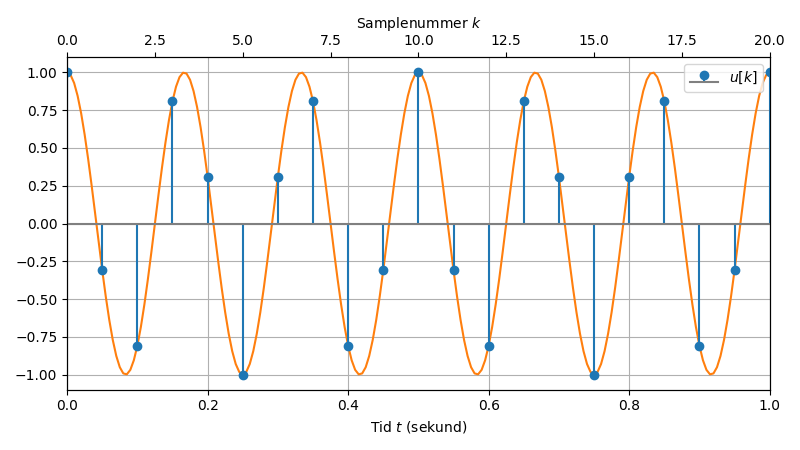

In [22]:
Fs = 20 # Samples per second
f = 6 # Hz

t = np.linspace(0, 1, 201)  # high resolution time array
k = np.arange(Fs+1)  # sample indices

u_t = cos(2*pi*f*t)
u_k = cos(2*pi*f/Fs*k)

plt.close(1); plt.figure(1);
plt.plot(t, u_t, "C1", label="$u(t)$")
plt.xlabel("Tid $t$ (sekund)")
plt.twiny(); plt.grid(False)
plt.stem(k, u_k, label="$u[k]$", basefmt="grey")
plt.xlabel("Samplenummer $k$")
plt.legend(loc="upper right")

# Tema:

* Intro til "Hybridsystem"
* Uniform Sampling (A/D omforming)
* <font color="d62728">Rekonstruksjon (D/A omforming)</font>
* Aliasing
* Kvantisering

# Rekonstruksjon av én sample


* Mange metoder for D/A omforming
    - Alle omhandler å erstatte en sample med en pulsform
    
    
* **Zero Order Hold** (ZOH) mest vanlig i digital reguleringsteknikk
    - Hver sample erstattes med en rektangulær puls med bredde $T_s$.
    
    
<img src="Figurer/intro/zoh_1.png" style="width: 80%; margin-left: 10%" />

# Rekonstruksjon av signal

* "Zero order hold" resulterer i et trappeformet utgangssignal $\bar{u}(t)$.
    - Betyr i praksis "sett utgangsspenningen lik nåværende sampleverdi $u[k]$, og la stå til det kommer nye instruksjoner".
    
<img src="Figurer/intro/zoh_2.png" style="width: 70%; margin-left: 10%" />

# Effekten av ZOH

* $\bar{u}(t)$ henger "i gjennomsnitt" $\frac{T_s}{2}$ sekund etter $y(t)$<br><img src="Figurer/intro/zoh_3.png" style="width: 70%; margin-left: 10%" /><br>
    * *Kantene "jevnes ut" av fysisk prossess (lavpass-egenskaper)*

# Seg 2: Regn ut regulatorens utgangsverdi i det tidsdiskrete domenet

* For hver ny måling ($e[n]$) som fulløres av A/D omformeren, så må en ny utgangsverdi ($u[n]$) beregnes.

<img src="Figurer/Fig3_GcZ.png" style="width: 60%; margin-left: 20%" />

* Bokstaven `z` i transferfunksjonen $G_c(z)$ antyder at dette er den digitale regulatorens *z-transform*. 
    * z-transformasjon er som laplace, bare for digitale LTI-system.

# Steg 3: Tilbake til tidskontinuerlige signal

* Alle metoder for rekonstruksjon bygger på å erstatte én signalsample med en "pulsform"
* "Zero Order Hold" er en vanlig og ukomplisert tilnærming.
    * Betyr i praksis "sett utgangsspenningen lik nåværende sampleverdi $x[n]$, og la stå til det kommer en ny sampleverdi".
* Uganssignalet blir en trappetrinns-approksimasjon
<img src="Figurer/Fig20_ZOH.png" width="75%">

# Er ZOH utgangssignal greit?

* I de fleste tilfeller vil det fysiske prosessen fint glatte ut trappetrinnskurven.
    * Prosessen fungerer som et lavpassfilter
    
<img src="Figurer/Fig4_ZOH.png" width="75%">

# Modell av hybridsystem

* Vi setter sammen A/D omforming, D/A omforming og digital regulator for å erstatte $G_c(s)$.

<img src="Figurer/Fig5_HybridModel.png" style="width: 80%; margin-left: 5%" />

* La oss for enkelhets skyld anta at prosessen $G_p(s)$ er en RLC-krets, og alle de tidskontinuerlige signalene $r(t)$, $y(t)$ og $\bar{u}(t)$ er elektriske spennings-signal.

## Eksempel på realisering med Arduino
<img src="Figurer/Fig6_ArduinoImplementation.png" style="width: 100%" />

# Case: *Digital PID-regulator*

<img src="Figurer/Fig8_PID.png" style="width: 80%; margin-left: 10%" />

## Eksempel: Oppkobling på Arduino

<img src="Figurer/Fig8_ArduinoPID.png" style="width: 80%; margin-left: 5%" />

* Bruker sensorverdi som input til derivasjonsledd.

# Integratorleddet
* Kan utregnes med enkel numerisk integrasjon.
* Løpende integral er sum av areal til rektanglene som strekker seg bakover i tid fra alle sampeltidspunkt.

<img src="Figurer/Fig13_Backdiff.png" style="width: 50%; margin-left: 15%" >

* Hvordan vil denne koden se ut?

# Differanseligningen

* Systemet vi nettopp implementerte med Arduino C beskrives i teorien med en *differanseligning*:$\\ $
$$y[n] = y[n-1] + T_s\cdot x[n]$$
    * $x[n]$ er inngangsverdi ved tidspunkt $t = n\cdot T_s$
    * $y[n]$ er utgangsverdi (beregnet løpende integral av $x(t)$) ved tidspunkt $t = n\cdot T_s$

### Standardform:

$$y[n] - y[n-1] = T_s\cdot x[n]$$

* Inngangs-signal $x[n]$ og utgangs-signal $y[n]$ plassert på hver sin side av likhetstegnet.

* Digitale filtre beskrives typisk med bruk av en differanseligning.
    * En integrator er én type digitalt filter.

# Frekvensanalyse av digitale filtre (i python/matlab)

* Alltid lurt å verifisere at diskretiseringen har ønskede frekvensegenskaper.
* Programmeringsverktøy kan brukes til å sammenligne frekvensegenskapene til både det kontinuerlige og det diskréte systemet.

<img src="Figurer/Fig9_Bode.png" style="width: 70%; margin-left: 15%" >

## Steg 1: Finn filterkoeffisienter

* Generell form for differanseligninger:
\begin{align}
a_0 \cdot y[n] + a_1 \cdot y[n-1] + \ldots + a_N \cdot y[n-N] &= b_0 \cdot x[n] + b_1 \cdot x[n-1] + \ldots + b_M \cdot x[n-M]\\
\sum_{k=0}^{N} a_k \cdot y[n-k] &= \sum_{k=0}^{M} b_k \cdot x[n-k]
\end{align}
    * Tallrekkene $a_k$ og $b_k$ er *filterkoeffisienter*
    

### Filterkoeffisienter for integrator:
\begin{align}
y[n] - y[n-1] &= T_s\cdot x[n]\\
\mathbf{1} \cdot y[n]\  \mathbf{- 1} \cdot y[n-1] &= \mathbf{T_s} \cdot x[n] 
\end{align}

$$ a_k = \{1, -1\},\ \  b_k = \{T_s\}$$

## Steg 2: Beregn frekvensrespons og lag plot

* Her har både Matlab og Python en funksjon som heter `freqz()`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

T_s = 0.01 # 100 sampler per sekund
a_k = [1, -1] 
b_k = [T_s]

f, Hz = sig.freqz(b_k, a_k, fs=1/T_s) # Finn frekvensrespons
w = f*2*np.pi # Konverter fra Hz til rad/s

# Vis Hz og Hs i to subplot for å sammenligne gain og fase
plt.subplot();plt.grid(True); plt.ylabel('Gain'); plt.xlabel('Frequency (rad/s)')
plt.plot(w, np.abs(Hz), label=r'$\left|H(z)\right|$')
plt.legend()

## Steg 3: Sammenlign frekvensrespons for det tidskontinuerlige systemet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

T_s = 0.01 # 100 sampler per sekund
a_k = [1, -1] 
b_k = [T_s]

f, Hz = sig.freqz(b_k, a_k, fs=1/T_s) # Finn frekvensrespons
w = f*2*np.pi # Konverter fra Hz til rad/s
Hs = 1/(1j*w) # Regn ut frekvensresponsen til 1/s

# Vis Hz og Hs i to subplot for å sammenligne gain og fase
plt.subplot(2,1,1); plt.grid(True); plt.ylabel('Gain'); 
plt.plot(w, np.abs(Hz), label=r'$\left|H(z)\right|$')
plt.plot(w, np.abs(Hs), '-.', label=r'$\left|H(s)\right|$')
plt.legend()
plt.subplot(2,1,2); plt.grid(True); plt.ylabel('Phase (degrees)'); plt.xlabel('Frequency (rad/s)')
plt.plot(w, np.angle(Hz)/np.pi*180, label=r'$\angle H(z)$')
plt.plot(w, np.angle(Hs)/np.pi*180, '-.', label=r'$\angle H(s)$')
plt.legend()

# Derivatorleddet

* Hvordan oppnå en diskrét realisering av $\frac{d x(t)}{dt}$?

* Enkleste løsning: finne differansen mellom to nåværende og forrige målte verdi.
    * Differanseligning: $y[n] = \frac{1}{T_s}\cdot x[n] - \frac{1}{T_s}\cdot x[n-1]$
    * Filterkoeffisienter: $a_k = \{1\}, \ \ b_k = \left\{ \frac{1}{T_s}, - \frac{1}{T_s}\right\}$

* Potensiell Arduino-implementasjon:
<pre><font color="#00979c">float</font> <font color="#000000">Differentiator</font><font color="#434f54">:</font><font color="#434f54">:</font><font color="#d35400">update</font><font color="#000000">(</font><font color="#00979c">float</font> <font color="#000000">x</font><font color="#000000">)</font>
<font color="#000000">{</font>
 &nbsp;<font color="#000000">y</font> <font color="#434f54">=</font> <font color="#000000">(</font><font color="#000000">x</font> <font color="#434f54">-</font> <font color="#000000">previous_x</font><font color="#000000">)</font><font color="#434f54">&#47;</font><font color="#000000">Ts</font><font color="#000000">;</font>
 &nbsp;<font color="#000000">previous_x</font> <font color="#434f54">=</font> <font color="#000000">x</font><font color="#000000">;</font>
 &nbsp;<font color="#5e6d03">return</font> <font color="#000000">y</font><font color="#000000">;</font>
<font color="#000000">}</font></pre>

## Frekvensanalyse av $y[n] = \frac{1}{T_s}\cdot x[n] - \frac{1}{T_s}\cdot x[n-1]$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

T_s = 0.01 # 100 sampler per sekund
a_k = [1] 
b_k = [1/T_s, -1/T_s]

f, Hz = sig.freqz(b_k, a_k, fs=1/T_s) # Finn frekvensrespons
w = f*2*np.pi # Konverter fra Hz til rad/s
Hs = 1j*w # Regn ut frekvensresponsen til s

# Vis Hz og Hs i to subplot for å sammenligne gain og fase
plt.subplot(2,1,1); plt.grid(True); plt.ylabel('Gain'); 
plt.plot(w, np.abs(Hz), label=r'$\left|H(z)\right|$')
plt.plot(w, np.abs(Hs), '-.', label=r'$\left|H(s)\right|$')
plt.legend()
plt.subplot(2,1,2); plt.grid(True); plt.ylabel('Phase (degrees)'); plt.xlabel('Frequency (rad/s)')
plt.plot(w, np.angle(Hz)/np.pi*180, label=r'$\angle H(z)$')
plt.plot(w, np.angle(Hs)/np.pi*180, '-.', label=r'$\angle H(s)$')
plt.legend()

# Målestøy i sensor
* Alle samplene vil typisk ha litt avvik av forskjellige årsaker.
* Avviket er ofte tilfeldig, og dermed også delvis høyfrekvent.
* Enkel differanseutregning vil forsterke den høyfrekvente delen av målestøyet velidig mye.

* Er det egentlig ønskelig med et derivasjonsledd som opererer i maksimalt frekvensområde?

# Derivator med lavpassfilter

* Gitt at prosessen har lavpass-egenskaper, er det lite interesse for å derivere i høye frekvenser.
* Det er vanlig å sette en øvre grensefrekvens $\omega_c$ for derivatoren.
    * Lavpassfilter i serie med derivator $s$:
$$H(s) = s \cdot \frac{\omega_c}{s+\omega_c}$$

* Differensialligning:
$$ \frac{d y(t)}{dt} + \omega_c \cdot y(t) = \omega_c \cdot \frac{d x(t)}{dt} $$

* Hvordan kan dette diskretiseres?

* Enkleste strategi: erstatte $\frac{d y(t)}{dt}$ med $\frac{y[n]-y[n-1]}{T_s}$, og  $\frac{d x(t)}{dt}$ med $\frac{x[n]-x[n-1]}{T_s}$

# Diskret derivator med lavpassfilter

* Differanseligning:

$$ y[n] - \frac{1}{\omega_c \cdot T_s + 1} \cdot y[n-1] = \frac{\omega_c}{\omega_c \cdot T_s + 1} \cdot x[n] - \frac{\omega_c}{\omega_c \cdot T_s + 1} x[n-1]$$

* Filterkoeffisienter:



# Frekvensanalyse

In [ ]:
T_s = 0.001
w_c = 0.1/Ts*2*np.pi

a_k = np.array([1, -1/(w_c*T_s + 1)])
b_k = np.array([1, -1])*w_c/(w_c*T_s + 1)

f, Hz = sig.freqz(b_k, a_k, fs=1/T_s) # Finn frekvensrespons
w = f*2*np.pi # Konverter fra Hz til rad/s
Hs = 1j*w # Regn ut frekvensresponsen til s

print("b:",b_k, "\na:", a_k)

# Vis Hz og Hs i to subplot for å sammenligne gain og fase
plt.subplot(2,1,1); plt.grid(True); plt.ylabel('Gain'); 
plt.plot(w, np.abs(Hz), label=r'$\left|H(z)\right|$')
plt.plot(w, np.abs(Hs), '-.', label=r'$\left|H(s)\right|$')
plt.legend()
plt.subplot(2,1,2); plt.grid(True); plt.ylabel('Phase (degrees)'); plt.xlabel('Frequency (rad/s)')
plt.plot(w, np.angle(Hz)/np.pi*180, label=r'$\angle H(z)$')
plt.plot(w, np.angle(Hs)/np.pi*180, '-.', label=r'$\angle H(s)$')
plt.legend()

# Forsinkelser i det digitale systemet

* Glatting av trappetrinnskurven (lavpassfiltrering) viser tydelig at ZOH-signalet vil henge etter med $\frac{T_s}{2}$ sekund.
    
<img src="Figurer/Fig22_ZOH2.png" width="65%">

* Prosesseringstid må også tas med i bildet. Denne kann være inntil én sampleperiode $T_s$.
    * NB! Vær sikker på at prosesseringstiden ikke er *mer* enn $T_s$. Da vil reell sampletid fort bli en helt annen.

* Maksimal "lovlig" forsinkelse: $d = \frac{3\cdot T_s}{2}$

# Tidsorsinkelse og stabilitet

* Gitt $d = \frac{3\cdot T_s}{2}$, korrigert transferfunksjon for regulatoren blir da:
$$\hat{G}(s) = G(s)\cdot e^{-\frac{3 \cdot T_s}{2}\cdot s}$$
    * Korrigert faserespons $\angle \hat{G}(\omega)$:
$$\angle \hat{G}(\omega) = \angle G(\omega) - \frac{3 \cdot T_s}{2} \cdot \omega$$

* Figuren viser hvordan en forsinkelse på $\frac{T_s}{2}$ ved ulike samplingsfrekvenser for et reguleringssystem kan påvirke fase-kurven.
<img src="Figurer/Fig23_DiscreteControl.png" width="75%">

# Nyquist-frekvensen

* Diskrete systemer vil ikke kunne håndtere frekvensegenser over til et visst punkt. Denne grensen er Nyquist-frekvensen.

## $$\text{Nyquist-frekvens} = \frac{f_s}{2} = \frac{1}{2\cdot T_s}$$

* Sinusbølger med frekvenser utover nyquist-frekvensen vil "se ut" som noe annet basert på samplene.
    * Dette er kjent som *aliasing*

# Oppsummering

